## Importing all required basic libaries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array,ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import np_utils
from tensorflow.keras.layers import BatchNormalization,Conv2D, Activation,MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.activations import relu

In [2]:
!pip install tflearn
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=False)

     |████████████████████████████████| 112kB 8.9MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=b9f3eef1c2245ab8b2564953f0a7063c986ad11aec0b9a677779f436b48f31ef
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn
Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [3]:
print('X shape',X.shape)
print('Y shape',Y.shape)

(1360, 224, 224, 3)

In [5]:
X[0]

array([[[0.9490196 , 0.9490196 , 0.99607843],
        [0.94509804, 0.94509804, 0.99215686],
        [0.94509804, 0.94509804, 0.99215686],
        ...,
        [0.02352941, 0.02745098, 0.05098039],
        [0.00392157, 0.00784314, 0.03529412],
        [0.00784314, 0.00784314, 0.03921569]],

       [[0.9254902 , 0.9254902 , 0.972549  ],
        [0.92941177, 0.92941177, 0.9764706 ],
        [0.92941177, 0.92941177, 0.9764706 ],
        ...,
        [0.        , 0.        , 0.01568628],
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.00392157, 0.02352941]],

       [[0.8980392 , 0.8980392 , 0.94509804],
        [0.90588236, 0.90588236, 0.9529412 ],
        [0.9098039 , 0.9098039 , 0.95686275],
        ...,
        [0.01176471, 0.00784314, 0.02745098],
        [0.00784314, 0.00392157, 0.02352941],
        [0.00784314, 0.00392157, 0.02352941]],

       ...,

       [[0.30980393, 0.23137255, 0.27450982],
        [0.18039216, 0.12941177, 0.20784314],
        [0.23137255, 0

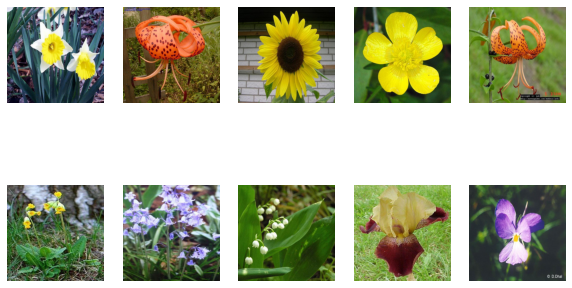

label for each of the above image: [ 0 13 16  6 13  5 10  9 12  8]


In [8]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (Y[0:10]))

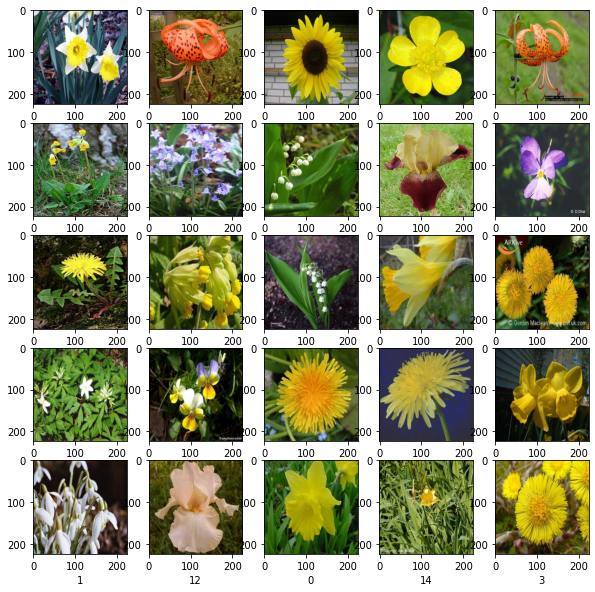

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(Y[i])

In [21]:
# split data into training and test
from sklearn.model_selection import train_test_split 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.15, random_state = 0, stratify=Y)

In [22]:
print('X_train image shape',X_train1.shape)
print('X_test image shape',X_test1.shape)
print('y_train image shape',y_train1.shape)
print('y_test image shape',y_test1.shape)

X_train image shape (1156, 224, 224, 3)
X_test image shape (204, 224, 224, 3)
y_train image shape (1156,)
y_test image shape (204,)


**Visualizing**

In [26]:
train_directory =os.path.realpath('train')
validation_directory = os.path.realpath('test')
image_size = 224

In [27]:
train_directory

'/content/train'

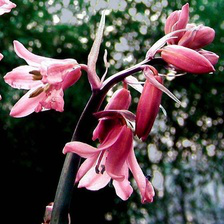

In [28]:
from PIL import Image, ImageFilter
image1 = Image.open("/content/train/10/1058.jpg")
image1.load()
image1

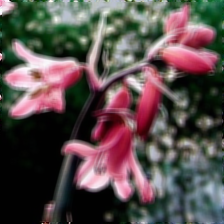

In [29]:
blurred_image = image1.filter(ImageFilter.BLUR)
blurred_image

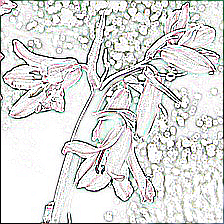

In [30]:
contour_image = image1.filter(ImageFilter.CONTOUR)
contour_image

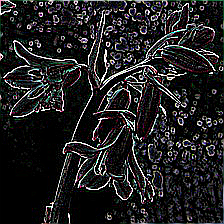

In [31]:
edge_detection_image = image1.filter(ImageFilter.FIND_EDGES)
edge_detection_image

In [ ]:
smooth = image1.filter(ImageFilter.SMOOTH)
smooth

In [32]:
X_train_knn = X_train1.reshape(X_train1.shape[0], 224*224*3)
X_test_knn = X_test1.reshape(X_test1.shape[0], 224*224*3)

print('Training set', X_train_knn.shape, y_train1.shape)
print('Test set', X_train_knn.shape, y_test1.shape)

Training set (1156, 150528) (1156,)
Test set (1156, 150528) (204,)


In [33]:
print(X_test_knn.shape)
print(y_test1.shape)

(204, 150528)
(204,)


In [36]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)

# no.of classes
num_classes = y_test.shape[1]
num_classes

17

# **Supervised**

In [38]:
x_tr = []
for i in range(1156):
    x_tr.append(X_train_knn[i,:].flatten())  
x_te = []
for i in range(204):
    x_te.append(X_test_knn[i,:].flatten())   # Same comment as above

In [39]:
print(len(x_tr))
print(len(y_train))
print(len(x_te))
print(len(y_test))

1156
1156
204
204


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
a =[]
j = []
def knnvalue(k):
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'uniform', metric='euclidean')
    NNH.fit(x_tr, y_train)
    predicted_labels = NNH.predict(x_te)
    
    ascore = accuracy_score(y_test, predicted_labels)
    MSE = 1-ascore
    a.append(MSE)
    j.append(k)
    print(ascore)

In [41]:
for i in range(1,8,2):
    knnvalue(i)

0.38235294117647056
0.2696078431372549
0.20098039215686275
0.17647058823529413


In [42]:
#From the above run, the max accuracy is attained at k value of 1. Now lets train the model for k value of 
#7 and print the metrics
NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'uniform', metric='euclidean')
NNH.fit(x_tr, y_train1)
pred=NNH.predict(x_te)

In [43]:
pred[0]

0

In [44]:
y_test1[0]

11

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,y_test1)

array([[6, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 9, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0],
       [0, 4, 0, 4, 0, 7, 0, 1, 0, 5, 0, 0, 1, 4, 3, 2, 0],
       [2, 0, 0, 4, 7, 3, 8, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 1, 0, 0, 0, 0, 0, 0, 2, 3, 1, 1, 0, 3, 1, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 4, 3, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 0, 7, 1, 0, 2, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,

In [46]:
cr= classification_report(y_test1,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.27      0.50      0.35        12
           1       0.50      0.08      0.14        12
           2       0.69      0.75      0.72        12
           3       0.00      0.00      0.00        12
           4       0.30      0.25      0.27        12
           5       0.23      0.58      0.33        12
           6       0.27      0.67      0.38        12
           7       0.86      0.50      0.63        12
           8       0.71      0.42      0.53        12
           9       0.12      0.17      0.14        12
          10       0.31      0.33      0.32        12
          11       0.00      0.00      0.00        12
          12       0.37      0.58      0.45        12
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        12
          15       0.38      0.42      0.40        12
          16       0.67      0.33      0.44        12

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of the KNN model is very bad. 

# **Neural Network** 

In [47]:
print('X_train shape',X_train1.shape)
print('y_train shape',y_train.shape)
print('X test shape',X_test1.shape)
print('y_test shape',y_test.shape)

X_train shape (1156, 224, 224, 3)
y_train shape (1156, 17)
X test shape (204, 224, 224, 3)
y_test shape (204, 17)


In [48]:
print('y_test shape',y_test[0])

y_test shape [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [49]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))    #Flatten layer of model
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',  optimizer='adam' ,  metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               77070848  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [51]:
model.fit(X_train1,y_train, validation_data=(X_test1, y_test), 
          epochs=30, batch_size=64, verbose=True)

Train on 1156 samples, validate on 204 samples
Epoch 1/30
1156/1156 [==============================] - 3s 2ms/sample - loss: 2.8035 - acc: 0.1107 - val_loss: 3.6881 - val_acc: 0.1471
Epoch 2/30
  64/1156 [>.............................] - ETA: 0s - loss: 2.5814 - acc: 0.2031

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1156/1156 [==============================] - 1s 722us/sample - loss: 2.5165 - acc: 0.1817 - val_loss: 2.9313 - val_acc: 0.1716
Epoch 3/30
1156/1156 [==============================] - 1s 719us/sample - loss: 2.3619 - acc: 0.2318 - val_loss: 2.8976 - val_acc: 0.1667
Epoch 4/30
1156/1156 [==============================] - 1s 722us/sample - loss: 2.2498 - acc: 0.2673 - val_loss: 2.7380 - val_acc: 0.1618
Epoch 5/30
1156/1156 [==============================] - 1s 723us/sample - loss: 2.0980 - acc: 0.3114 - val_loss: 2.4781 - val_acc: 0.2157
Epoch 6/30
1156/1156 [==============================] - 1s 715us/sample - loss: 2.0012 - acc: 0.3408 - val_loss: 2.3091 - val_acc: 0.2794
Epoch 7/30
1156/1156 [==============================] - 1s 713us/sample - loss: 1.8880 - acc: 0.3659 - val_loss: 2.4384 - val_acc: 0.2402
Epoch 8/30
1156/1156 [==============================] - 1s 718us/sample - loss: 1.7749 - acc: 0.3910 - val_loss: 2.1702 - val_acc: 0.2696
Epoch 9/30
1156/1156 [=======================

# **Convolution Network Model**

In [52]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()
#normalize data
model.add(BatchNormalization(input_shape=(224,224,3)))
#Add first convolutional layer
model.add(Conv2D(128, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 strides=2,
                                activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(BatchNormalization())    #normalize data

#Add second convolutional layer
model.add(Conv2D(96, kernel_size=(3,3), activation='relu',strides=2))
model.add(MaxPool2D(pool_size=(3,3)))

#Add 3 convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))   
model.add(BatchNormalization())    #normalize data
#Add MaxPooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(Flatten())
#Dens layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(64, activation='relu'))
#Add another dropout layer
model.add(Dropout(0.15))
#Output layer
model.add(Dense(17, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
#Train the model
cnnmodel=model.fit(X_train1,y_train,    
          validation_data=(X_test1,y_test),
          epochs=30,
          batch_size=64)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 111, 111, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 96)        110688    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          5

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1156/1156 [==============================] - 7s 6ms/sample - loss: 2.5762 - acc: 0.1998 - val_loss: 2.7811 - val_acc: 0.1471
Epoch 2/30
1156/1156 [==============================] - 1s 1ms/sample - loss: 1.8625 - acc: 0.3858 - val_loss: 2.8146 - val_acc: 0.0980
Epoch 3/30
1156/1156 [==============================] - 1s 1ms/sample - loss: 1.6548 - acc: 0.4602 - val_loss: 2.8750 - val_acc: 0.1127
Epoch 4/30
1156/1156 [==============================] - 1s 1ms/sample - loss: 1.4576 - acc: 0.5277 - val_loss: 2.9862 - val_acc: 0.1324
Epoch 5/30
1156/1156 [==============================] - 1s 1ms/sample - loss: 1.2785 - acc: 0.5761 - val_loss: 3.0750 - val_acc: 0.1520
Epoch 6/30
1156/1156 [==============================] - 1s 1ms/sample - loss: 1.2221 - acc: 0.6081 - val_loss: 3.1503 - val_acc: 0.0980
Epoch 7/30
1156/1156 [==============================] - 1s 1ms/sample - loss: 1.0892 - acc: 0.6401 - val_loss: 3.3033 - val_acc: 0.0637
Epoch 8/30
1156/1156 [==============================] - 1s 

In [53]:
model.evaluate(X_test1,y_test)

[1.1717023849487305, 0.6617647]

In [54]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                         shear_range=0.3, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, fill_mode='nearest'
                        )

**Pre Trained CNN- Transer Learning**

In [64]:
tf.keras.backend.clear_session()
# use vgg16 pre-trained model with trainable densely connected output layer
from keras.applications import VGG16

#Load the VGG model
vgg_conv_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers except for the last layer: 
for layer in vgg_conv_model.layers:
    layer.trainable = False
vgg_conv_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [65]:
# Create the model
model = Sequential()
# Add the vgg convolutional base model
model.add(vgg_conv_model)
# Add new layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                4369      
Total params: 21,141,841
Trainable params: 6,427,153
Non-trainable params: 14,714,688
_________________________________________________________________


In [66]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('CNN_oxflower_VGG.h5',
                                                     save_best_only = True,
                                                     monitor = 'val_acc',
                                                     mode = 'max',
                                                     verbose = 1)

In [67]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [68]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.3, height_shift_range=0.3,
                         shear_range=0.3, zoom_range=0.3, horizontal_flip=True, vertical_flip=True, fill_mode='nearest'
                        )
#Train the model
model.fit(aug.flow(X_train1, y_train,batch_size=64), 
                     validation_data=(X_test1,y_test), 
                     epochs=30,
                    steps_per_epoch=len(X_train1)//64, 
                     verbose=1,
                     callbacks = [model_checkpoint])

Epoch 1/30
18/18 [==============================] - ETA: 0s - batch: 8.5000 - size: 60.6667 - loss: 4.0677 - acc: 0.1126

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Epoch 00001: val_acc improved from -inf to 0.19608, saving model to CNN_oxflower_VGG.h5
18/18 [==============================] - 15s 813ms/step - batch: 8.5000 - size: 60.6667 - loss: 4.0677 - acc: 0.1126 - val_loss: 2.4457 - val_acc: 0.1961
Epoch 2/30
18/18 [==============================] - ETA: 0s - batch: 8.5000 - size: 60.6667 - loss: 2.4050 - acc: 0.2234
Epoch 00002: val_acc improved from 0.19608 to 0.36765, saving model to CNN_oxflower_VGG.h5
18/18 [==============================] - 13s 780ms/step - batch: 8.5000 - size: 60.6667 - loss: 2.4050 - acc: 0.2234 - val_loss: 1.9522 - val_acc: 0.3676
Epoch 3/30
18/18 [==============================] - ETA: 0s - batch: 8.5000 - size: 64.0000 - loss: 2.1697 - acc: 0.2760
Epoch 00003: val_acc improved from 0.36765 to 0.51961, saving model to CNN_oxflower_VGG.h5
18/18 [==============================] - 14s 826ms/step - batch: 8.5000 - size: 64.0000 - loss: 2.1697 - acc: 0.2760 - val_loss: 1.7118 - val_acc: 0.5196
Epoch 4/30
18/18 [=======